### 1. Factor Analysis

#### factors: latent variables, not visible but meaningful 
####                            - why the data behaves in this way

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

In [2]:
iris =  datasets.load_iris()

X = iris.data
variable_names = iris.feature_names

X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [3]:
# Call the model and fit the data

factor = FactorAnalysis().fit(X)

DF = pd.DataFrame(factor.components_, columns=variable_names)
print(DF)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


In [ ]:
# -1 or 1: the factor has a strong influence 
# 0: the factor has no influence

## Factor 1: the underlying latent variable that influences sepal len, ..., petal width

------------------------

### 2. Principal Component Analysis (PCA)

#### Singular Value Decomposition - SVD - Linear Algebra: A = B x C
#### A has more attributes
#### unsuperised
#### Dimension reduction is to remove noise and reduce redundant information

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import datasets

In [6]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [9]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [10]:
pca = decomposition.PCA()    # calling the model
iris_pca = pca.fit_transform(X)    # fitting the data

pca.explained_variance_ratio_    
## we want to retain at least 70% of the dataset's variance (information)
## let's take the first two components (97.7%)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [11]:
pca.explained_variance_ratio_.sum()

1.0

In [12]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


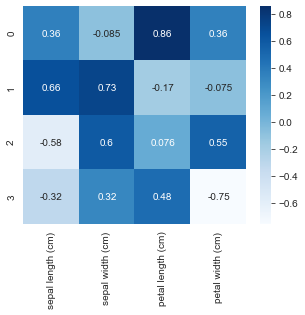

In [13]:
sb.heatmap(comps, cmap="Blues", annot=True)

#### Component 0 and 1 can be used as inputs in a machine learning model